In [1]:
import random
import matplotlib.pyplot as plt
from pathlib import Path
from preprocessing import clean_gutenberg, tokenize
from collocations import make_graph, cosine_similarities
from plotting import draw_graph

In [2]:
def read_all(directory):
    return [file.read_text() for file in Path(directory).glob('*') if file.is_file()]

def flatten(lst):
    return [x for ls in lst for x in ls]

def neighbourhood(graph, node, filter_function=lambda edges: edges):
    edges = filter_function(graph.out_edges(node, data=True))
    return graph.edge_subgraph([(edge[0], edge[1]) for edge in edges])

def top_n_filter(n):
    return lambda edges: sorted(edges, key=lambda item: item[2]["weight"], reverse=True)[:n]

def draw(graph):
    return draw_graph(graph, label_attribute="weight", label_function=lambda x: f"{x:.3f}", width_attribute="weight")

In [3]:
tokens1, vocabulary1 = tokenize(clean_gutenberg(text) for text in read_all("data/1"))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [4]:
tokens2, vocabulary2 = tokenize(clean_gutenberg(text) for text in read_all("data/2"))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [5]:
vocabulary = sorted(set(vocabulary1) & set(vocabulary2))
len(vocabulary)

10540

In [6]:
G1 = make_graph(flatten(tokens1), vocabulary)

In [7]:
G2 = make_graph(flatten(tokens2), vocabulary)

In [8]:
similarities = cosine_similarities(G1, G2, vocabulary)
similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

  0%|          | 0/10540 [00:00<?, ?it/s]

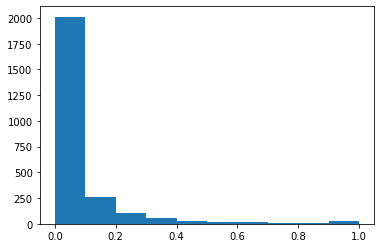

In [9]:
_ = plt.hist([score for _, score in similarities if score > 0])

In [10]:
node, score = random.choice([(node, score) for node, score in similarities if 1 > score > 0])
node, score

('hath', 0.04712745936327265)

In [11]:
draw(neighbourhood(G1, node, filter_function=top_n_filter(10)))

In [12]:
draw(neighbourhood(G2, node, filter_function=top_n_filter(10)))